In [ ]:
from IPython.core.display import display, HTML
display(HTML("""<a href="https://personal.ntu.edu.sg/nprivault/indext.html">https://personal.ntu.edu.sg/nprivault/indext.html</a>"""))

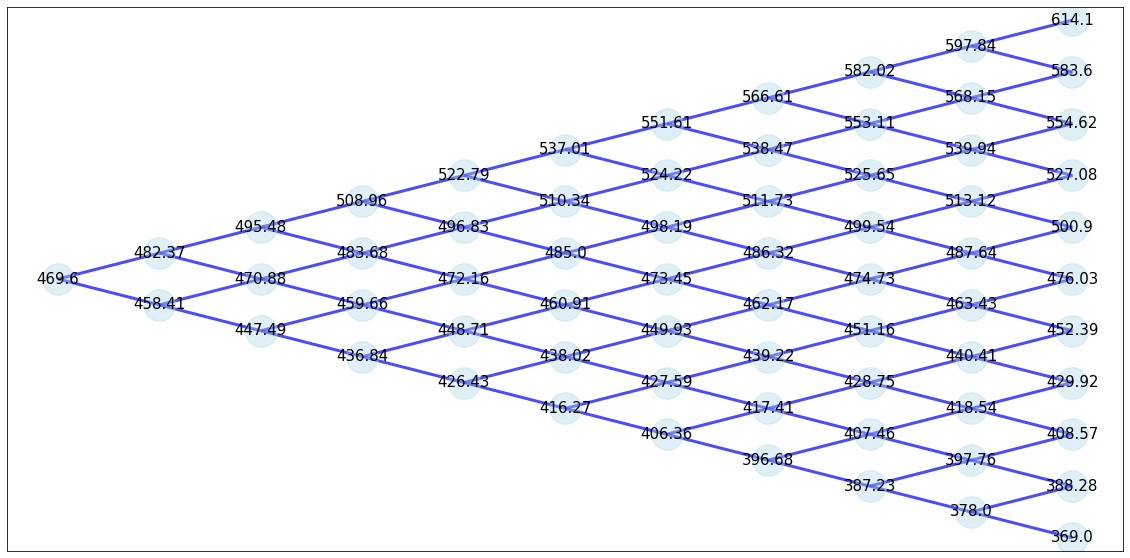

In [4]:
# This code implements hedging and pricing using backward recursion

%matplotlib inline
import networkx as nx 
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt 

N=10
S0=469.6

r=0.0
a=-0.02382
b=0.02719

p = (r-a)/(b-a)
q = (b-r)/(b-a)

def plot_tree(g):
    plt.figure(figsize=(20,10))
    pos={}
    lab={}
    
    for n in g.nodes():
        pos[n]=(n[0],n[1])
        if g.nodes[n]['value'] is not None: lab[n]=float("{0:.2f}".format(g.nodes[n]['value']))
        
    elarge=g.edges(data=True)
    nx.draw_networkx_labels(g,pos,lab,font_size=15)
    nx.draw_networkx_nodes(g,pos,node_color='lightblue',alpha=0.4,node_size=1000)
    nx.draw_networkx_edges(g,pos,edge_color='blue',alpha=0.7,width=3,edgelist=elarge)
    plt.ylim(-N+0.5,N+1.5) 
    plt.xlim(-0.5,N+0.5)
    plt.show()
    
def graph_stock():
    S=nx.Graph()
    for k in range(0,N):
        for l in range(-k+1,k+3,2):
            S.add_edge((k,l),(k+1,l+1))
            S.add_edge((k,l),(k+1,l-1))
            
    for n in S.nodes():        
        k=n[0]
        l=n[1]-1
        S.nodes[n]['value']=S0*((1.0+b)**((k+l)/2))*((1.0+a)**((k-l)/2))
    return S

plot_tree(graph_stock())

In [6]:
def European_put_price(K):

    price = nx.Graph()    
    hedge = nx.Graph()
    S = graph_stock()

    for k in range(0,N):
            for l in range(-k+1,k+3,2):
                price.add_edge((k,l),(k+1,l+1))
                price.add_edge((k,l),(k+1,l-1))
                hedge.add_edge((k,l),(k+1,l+1))
                hedge.add_edge((k,l),(k+1,l-1))
    
    for l in range(-N+1,N+3,2):
        price.nodes[(N,l)]['value'] = np.maximum(K - S.nodes[(N,l)]['value'],0)
     
    for k in reversed(range(0,N)):
        for l in range(-k+1,k+3,2):
            price.nodes[(k,l)]['value'] = (price.nodes[(k+1,l+1)]['value']*p+price.nodes[(k+1,l-1)]['value']*q)/(1+r)        
    return price

In [7]:
def European_put_hedge_risky(K):

    price = nx.Graph()
    hedge_risky = nx.Graph()
    S = graph_stock()

    for k in range(0,N):
            for l in range(-k+1,k+3,2):
                price.add_edge((k,l),(k+1,l+1))
                price.add_edge((k,l),(k+1,l-1))
                hedge_risky.add_edge((k,l),(k+1,l+1))
                hedge_risky.add_edge((k,l),(k+1,l-1))
    
    for l in range(-N+1,N+3,2):
        price.nodes[(N,l)]['value'] = np.maximum(K - S.nodes[(N,l)]['value'],0)
        hedge_risky.nodes[(N,l)]['value'] = None

    for k in reversed(range(0,N)):
        for l in range(-k+1,k+3,2):
            price.nodes[(k,l)]['value'] = (price.nodes[(k+1,l+1)]['value']*p+price.nodes[(k+1,l-1)]['value']*q)/(1+r)
            hedge_risky.nodes[(k,l)]['value'] = (price.nodes[(k+1,l+1)]['value']-price.nodes[(k+1,l-1)]['value'])/(b-a)/(S.nodes[(k,l)]['value'])
    return hedge_risky

In [8]:
def European_put_hedge_riskless(K):

    price = nx.Graph()
    hedge_riskless = nx.Graph()
    S = graph_stock()

    for k in range(0,N):
            for l in range(-k+1,k+3,2):
                price.add_edge((k,l),(k+1,l+1))
                price.add_edge((k,l),(k+1,l-1))
                hedge_riskless.add_edge((k,l),(k+1,l+1))
                hedge_riskless.add_edge((k,l),(k+1,l-1))
    
    for l in range(-N+1,N+3,2):
        price.nodes[(N,l)]['value'] = np.maximum(K - S.nodes[(N,l)]['value'],0)
        hedge_riskless.nodes[(N,l)]['value'] = None

    for k in reversed(range(0,N)):
        for l in range(-k+1,k+3,2):
            price.nodes[(k,l)]['value'] = (price.nodes[(k+1,l+1)]['value']*p+price.nodes[(k+1,l-1)]['value']*q)/(1+r)
            hedge_riskless.nodes[(k,l)]['value'] = ((1+b)*price.nodes[(k+1,l-1)]['value']-(1+a)*price.nodes[(k+1,l+1)]['value'])/(b-a)/pow(1+r,k+1)
    return hedge_riskless

Option prices:


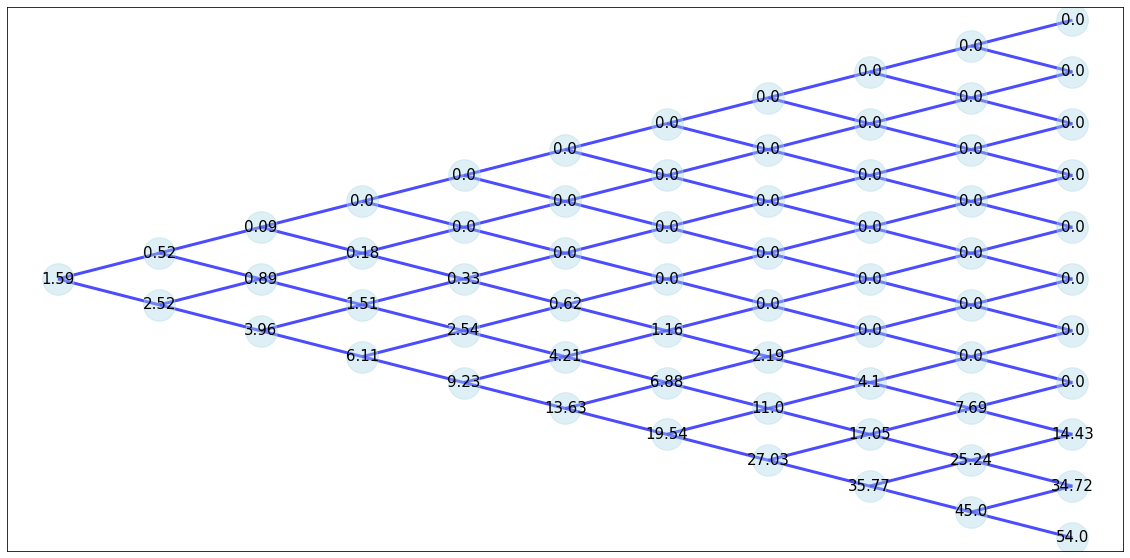

Risky hedging strategy:


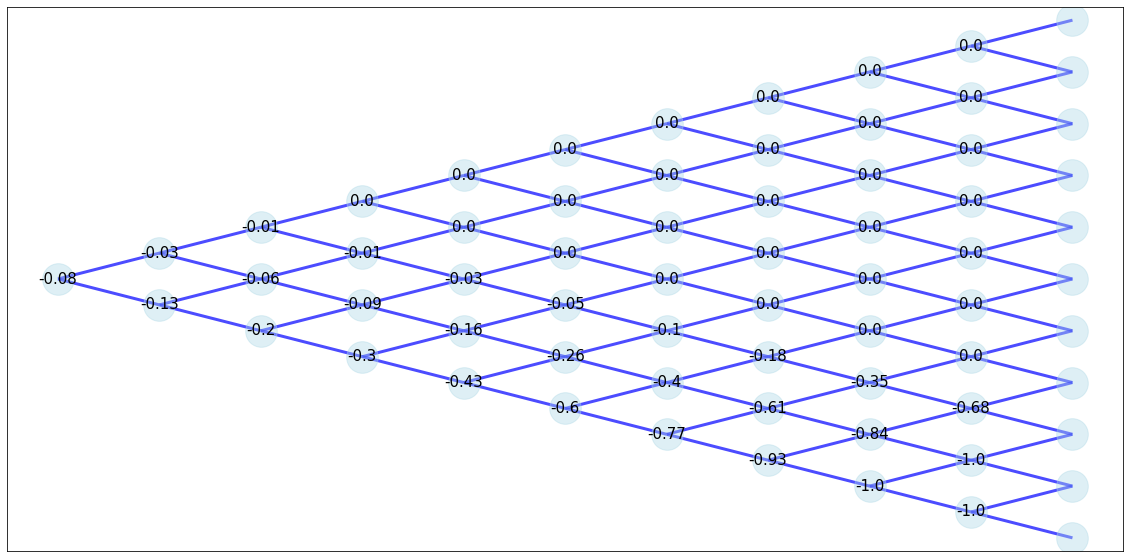

Riskless hedging strategy:


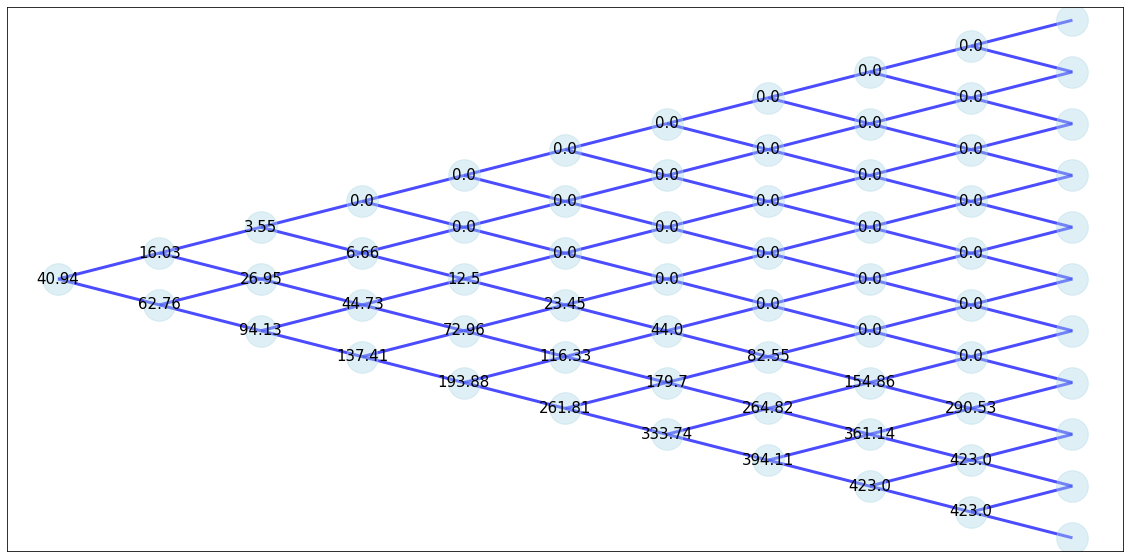

In [9]:
K = input("Strike Price K=")

print('Option prices:') 
plot_tree(European_put_price(float(K))) 
print('Risky hedging strategy:') 
plot_tree(European_put_hedge_risky(float(K))) 
print('Riskless hedging strategy:') 
plot_tree(European_put_hedge_riskless(float(K)))